In [1]:
from torchvision.datasets.mnist import MNIST
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import ToTensor
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
train_data = MNIST(root='./',train=True,download=True,transform=ToTensor())
test_data = MNIST(root='./',train=False,download=True,transform=ToTensor())

100.0%
100.0%
100.0%
100.0%


In [3]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [4]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

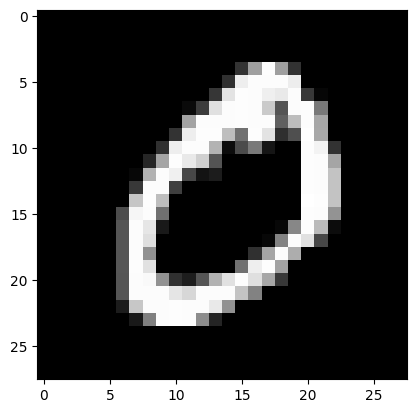

In [9]:
plt.imshow(train_data.data[1],cmap='gray')
plt.show()

In [10]:
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

next(iter(train_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [11]:
model = nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,10)
)

model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [13]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [15]:
from torch.optim.adam import Adam

optim = Adam(model.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss()
epochs = 20

for epoch in range(epochs):
    for data,label in train_loader:
        optim.zero_grad()
        data = torch.reshape(data,(-1,784))
        data = data.to(device)
        pred = model(data)
        loss = criterion(pred,label.to(device))
        loss.backward()
        optim.step()
    
    print('epoch : ' , loss)



epoch :  tensor(0.0836, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.1125, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0434, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.2270, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.1657, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward0>)


KeyboardInterrupt: 

In [27]:
model.eval()

total = 0
correct = 0

with torch.no_grad():
    for data,label in test_loader:

        data = torch.reshape(data,(-1,784))
        data = data.to(device)
        pred = model(data)

        label = label.to(device)

        _, predresult = torch.max(pred, 1)

        print(predresult)
        print(label)

        correct += (predresult == label).sum().item()
        total += label.size(0)


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5,

In [28]:
correct / total

0.9747

In [20]:
torch.max(torch.tensor([[1,2,3,4,5]]),1)

torch.return_types.max(
values=tensor([5]),
indices=tensor([4]))

In [24]:
(predresult == label).sum() / 32

tensor(0.9688, device='cuda:0')

In [25]:
label.size()

torch.Size([32])